<a href="https://colab.research.google.com/github/Surajbharadwaj11/YBI-Project/blob/main/YBI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of The Project**

Srevo Prediction Using Linear Regression





**Objective**

A servo, short for servomechanism, is a device or mechanism typically consisting of a motor, a feedback system, and a controller. Its primary function is to precisely control the position, speed, or acceleration of mechanical components, usually in response to a control signal.

The objective of a "Servo Prediction using Linear Regression" project is to leverage linear regression techniques to forecast the behavior or characteristics of a servo system based on input parameters. This entails developing a predictive model capable of estimating crucial parameters such as position, speed, or acceleration, derived from variables like voltage, current, or control signals. Furthermore, the project aims to optimize servo system performance by discerning the impact of various input parameters on its behavior. Through the utilization of linear regression, the model can identify influential factors and suggest optimal settings for enhanced performance.

**Data Source**


For a "Servo Prediction using Linear Regression" project, data can be sourced from various sources to facilitate model training and prediction. Experimental data is one valuable source, involving conducting experiments on the servo system under different conditions to gather relevant measurements. These measurements typically include parameters like position, speed, acceleration, voltage, current, and control signals. Sensor data presents another avenue, where sensors such as encoders, potentiometers, accelerometers, and tachometers can provide real-time information on the system's performance. Simulated data offers a controlled environment for generating synthetic data using simulation software or models of the servo system, allowing for extensive experimentation without physical constraints. Public datasets related to robotics, control systems, or mechanical engineering might also provide useful insights, although specific datasets tailored for servo prediction using linear regression may be limited.


**Import Library**

In [2]:
import pandas as pd
import numpy as np


**Import Data**

In [20]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [110]:
df.head(5)

,Motor,Screw,Pgain,Vgain,Class
0,1.820896,1.797101,5,4,4
1,1.000000,4.000000,6,5,11
2,4.000000,4.000000,4,3,6
3,1.000000,0.000000,3,2,48
4,4.000000,1.000000,6,5,6


**Describe Data**

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Motor   167 non-null    float64
 1   Screw   167 non-null    float64
 2   Pgain   167 non-null    int64  
 3   Vgain   167 non-null    int64  
 4   Class   167 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.6 KB


In [112]:
df.describe()

,Motor,Screw,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,1.820896,1.797101,4.155689,2.538922,21.173653
std,1.352600,1.448553,1.017770,1.369850,13.908038
min,0.000000,0.000000,3.000000,1.000000,1.000000
25%,1.000000,0.500000,3.000000,1.000000,10.500000
50%,1.820896,1.797101,4.000000,2.000000,18.000000
75%,3.000000,3.000000,5.000000,4.000000,33.500000
max,4.000000,4.000000,6.000000,5.000000,51.000000


In [113]:
df.shape

(167, 5)

In [114]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

**Data Visualization and Data Preprocessing**

In [115]:
df[['Motor']].value_counts()

Motor   
3.000000    40
0.000000    36
1.000000    36
1.820896    33
4.000000    22
Name: count, dtype: int64

In [116]:
df[['Screw']].value_counts()

Screw   
0.000000    42
1.000000    35
3.000000    31
4.000000    30
1.797101    29
Name: count, dtype: int64

**Define Target Variable (y) and Feature Variables (X)**

In [117]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3, 'E':4}},inplace=True)

In [118]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3, 'E':4}},inplace=True)

In [119]:
y=df['Class']

In [31]:
y.shape

(167,)

In [120]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [121]:
X=df[['Motor','Screw','Pgain','Vgain']]

In [122]:
X=df.drop('Class',axis=1)

In [123]:
X.shape

(167, 4)

In [124]:
X

,Motor,Screw,Pgain,Vgain
0,1.820896,1.797101,5,4
1,1.000000,4.000000,6,5
2,4.000000,4.000000,4,3
3,1.000000,0.000000,3,2
4,4.000000,1.000000,6,5
...,...,...,...,...
162,1.000000,3.000000,3,2
163,1.000000,1.797101,3,1
164,3.000000,4.000000,4,3
165,0.000000,1.000000,3,2


**Get Train Test Split**

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2529)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

**Get Model Train**

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model= LinearRegression()

In [131]:
model.fit(X_train, y_train)

LinearRegression()

**Model Prediction**

In [132]:
y_pred = model.predict(X_test)

In [133]:
y_pred.shape

(51,)

In [134]:
y_pred

array([34.9131256 , 28.24878654, 15.81057277, 25.02940484, 35.48016242,
       27.31789313,  6.62892254, 14.85160704, 37.53704329, 40.89805311,
       10.74268428, 23.28050535, 20.29273107, 13.79087376, 25.70578279,
       22.21977207,  5.40874112, 36.60160989, 38.65849076, -0.81082741,
       31.05841932, 26.2985122 , 37.15268796, 24.68640187, 16.80188138,
       10.45793624, 25.6453676 , 12.04197427, 24.58463431,  7.64830347,
       27.70224846, 20.5774791 , 32.4691548 , 28.8001636 ,  7.62023116,
        0.90788945, 22.97252398, 30.30566741, 14.54362566, 34.72741052,
       28.72378964, 18.96536877, 17.92332885, 13.80956712, 31.53342241,
       32.48784816, 30.41227393, -0.39623951, 21.02224964, 18.21261686,
       22.63435997])

**Model Evaluation**

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [136]:
mean_squared_error(y_test,y_pred)

62.49187283323492

In [137]:
mean_absolute_error(y_test,y_pred)

6.8879660627343515

In [138]:
r2_score(y_test,y_pred)

0.6978594163213956

**Visualization of Actual Vs Predicted Results**

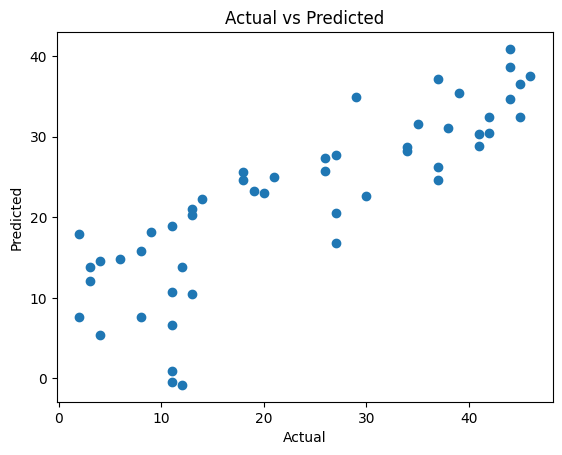

In [139]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

**For Future Predictions**

In [143]:
X_new= df.sample(1)

In [144]:
X_new

,Motor,Screw,Pgain,Vgain,Class
162,1.0,3.0,3,2,44


In [145]:
X_new.shape

(1, 5)

In [146]:
X_new= X_new.drop('Class',axis=1)

In [147]:
X_new

,Motor,Screw,Pgain,Vgain
162,1.0,3.0,3,2


In [148]:
X_new.shape

(1, 4)

In [149]:
y_pred_new= model.predict(X_new)

In [150]:
y_pred_new

array([33.2219067])